<a href="https://colab.research.google.com/github/Witney-C/qm2group18/blob/main/Choropleth_Attempt_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install newest branch
!pip install pysal

#Install the geopandas module
!pip install geopandas

     |████████████████████████████████| 2.4 MB 6.9 MB/s 
     |████████████████████████████████| 95 kB 2.9 MB/s 
     |████████████████████████████████| 60 kB 4.2 MB/s 
     |████████████████████████████████| 55 kB 2.0 MB/s 
     |████████████████████████████████| 164 kB 52.8 MB/s 
     |████████████████████████████████| 46 kB 3.3 MB/s 
     |████████████████████████████████| 41 kB 577 kB/s 
     |████████████████████████████████| 209 kB 46.9 MB/s 
     |████████████████████████████████| 5.7 MB 55.7 MB/s 
     |████████████████████████████████| 81 kB 9.1 MB/s 
     |████████████████████████████████| 138 kB 60.0 MB/s 
     |████████████████████████████████| 226 kB 48.5 MB/s 
     |████████████████████████████████| 269 kB 59.4 MB/s 
     |████████████████████████████████| 66.5 MB 146 kB/s 
     |████████████████████████████████| 117 kB 76.9 MB/s 
     |████████████████████████████████| 2.1 MB 47.3 MB/s 
     |████████████████████████████████| 1.0 MB 52.0 MB/s 
     |█████████████████████

In [2]:
!mkdir data

In [20]:
!curl https://raw.githubusercontent.com/Witney-C/qm2group18/main/clinicsperwomen.csv -o ./data/access_data.csv
!curl https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json -o ./data/counties_geojson.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 58813  100 58813    0     0   512k      0 --:--:-- --:--:-- --:--:--  512k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3141k  100 3141k    0     0  15.1M      0 --:--:-- --:--:-- --:--:-- 15.1M


In [4]:
!pip install descartes
!pip install mapclassify

In [5]:
from pysal import *
import geopandas as gp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import pylab
import descartes
import mapclassify

%matplotlib inline

plt.style.use('ggplot')
pylab.rcParams['figure.figsize'] = (20., 16.)

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [21]:
data_path = "/content/data/counties_geojson.json"

countygeo = gp.read_file(data_path)

countygeo

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry
0,01001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402..."
1,01009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840..."
2,01017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772..."
3,01021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929..."
4,01033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587..."
...,...,...,...,...,...,...,...,...
3216,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ..."
3217,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243..."
3218,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512..."
3219,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891..."


In [22]:
#find out crs of geometry
countygeo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
#project the lon/lat geometry
countygeo.crs = 'epsg:4326'
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_countygeo = countygeo.to_crs(crs=target_crs)

In [24]:
countygeo['geometry'].head()

0    POLYGON ((-86.49677 32.34444, -86.71790 32.402...
1    POLYGON ((-86.57780 33.76532, -86.75914 33.840...
2    POLYGON ((-85.18413 32.87053, -85.12342 32.772...
3    POLYGON ((-86.51734 33.02057, -86.51596 32.929...
4    POLYGON ((-88.13999 34.58170, -88.13925 34.587...
Name: geometry, dtype: geometry

In [25]:
projected_countygeo['geometry'].head()

0    POLYGON ((-9628776.837 3785750.549, -9653392.1...
1    POLYGON ((-9637796.499 3973585.638, -9657983.7...
2    POLYGON ((-9482654.087 3854941.816, -9475895.8...
3    POLYGON ((-9631066.679 3874750.966, -9630912.5...
4    POLYGON ((-9811698.583 4082928.727, -9811615.9...
Name: geometry, dtype: geometry

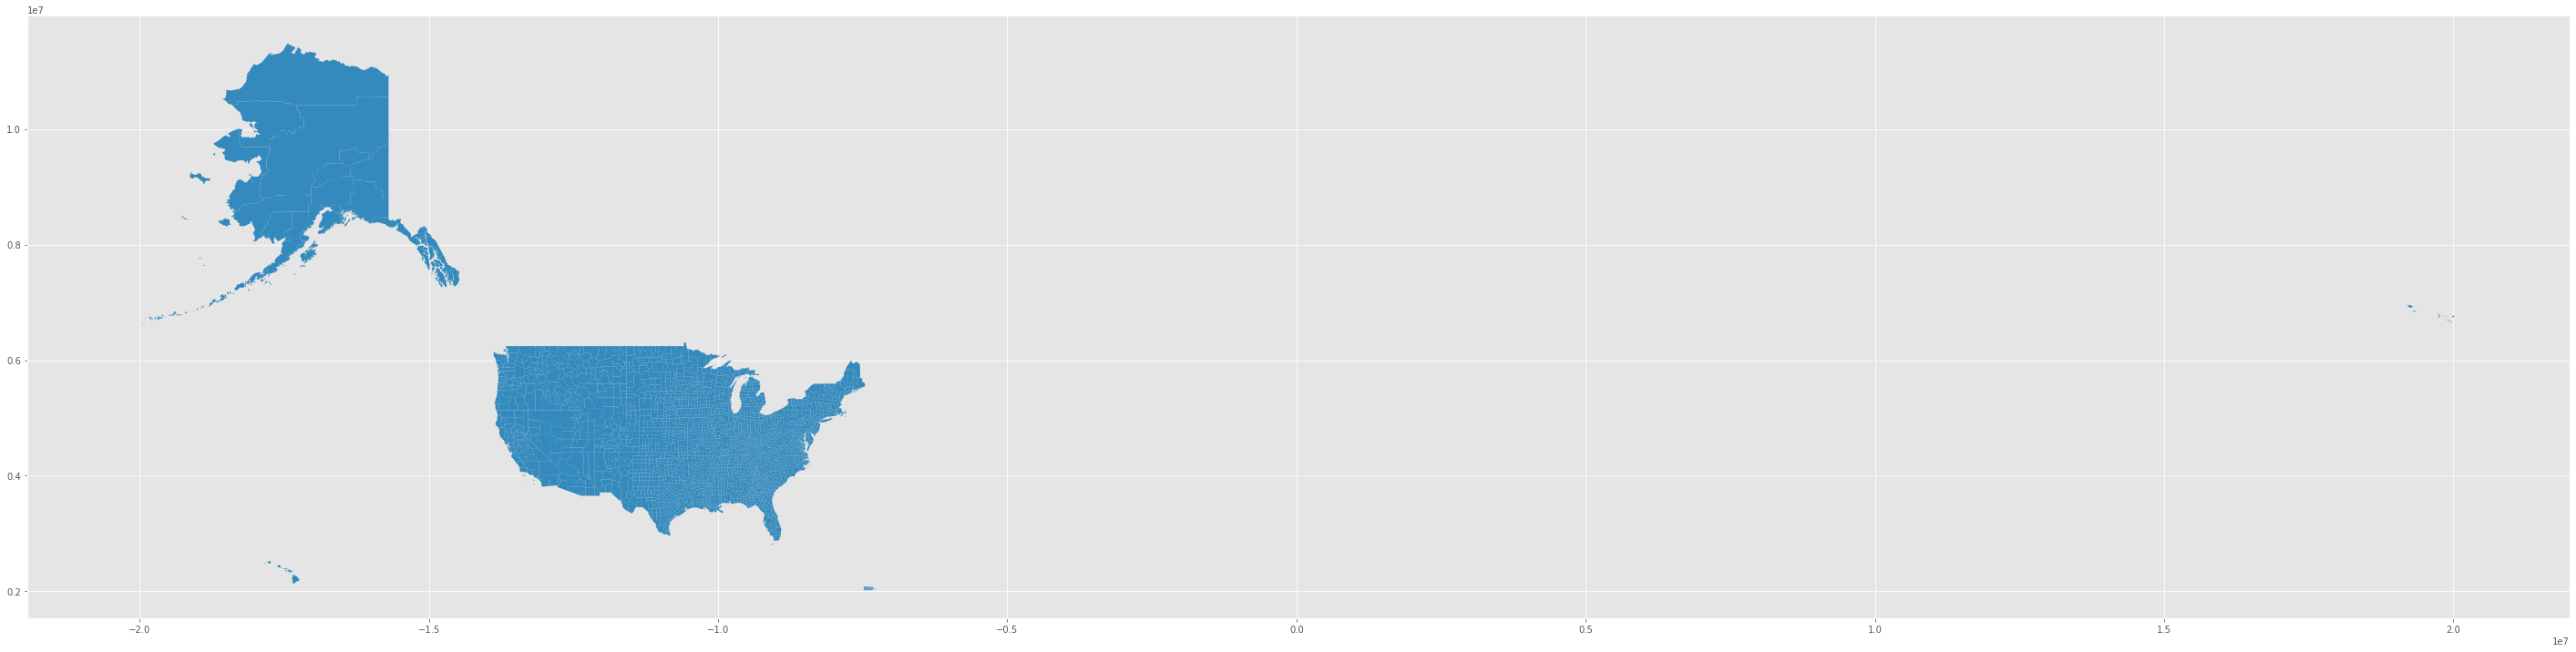

In [27]:
pylab.rcParams['figure.figsize'] = (50., 50.)
projected_countygeo.plot()

In [ ]:
#try and zoom in on plot


In [43]:
#load in clinic data and clean it, make fips an int
data_path2 = "/content/data/access_data.csv"

access = pd.read_csv(data_path2, index_col='fips', na_values=['u','#VALUE!'])
access.drop('Unnamed: 0', axis=1, inplace=True)
access

In [34]:
access['No. of clinics per 1000 women with demand'].head()

fips
1001    0.2999
1003    0.2624
1005    1.2658
1007    2.1186
1009    0.3170
Name: No. of clinics per 1000 women with demand, dtype: float64

In [45]:
countygeo['id']=countygeo['id'].astype(int)
countygeo['id'].head()

0    1001
1    1009
2    1017
3    1021
4    1033
Name: id, dtype: int64

In [46]:
#create new geodataframe using fips codes/id as merger
geoaccess = countygeo.merge(access,left_on='id',right_on='fips')
geoaccess

,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,No. of clinics per 1000 women with demand
0,1001,0500000US01001,01,001,Autauga,County,594.436,"POLYGON ((-86.49677 32.34444, -86.71790 32.402...",0.2999
1,1009,0500000US01009,01,009,Blount,County,644.776,"POLYGON ((-86.57780 33.76532, -86.75914 33.840...",0.3170
2,1017,0500000US01017,01,017,Chambers,County,596.531,"POLYGON ((-85.18413 32.87053, -85.12342 32.772...",0.2584
3,1021,0500000US01021,01,021,Chilton,County,692.854,"POLYGON ((-86.51734 33.02057, -86.51596 32.929...",0.5929
4,1033,0500000US01033,01,033,Colbert,County,592.619,"POLYGON ((-88.13999 34.58170, -88.13925 34.587...",0.3322
...,...,...,...,...,...,...,...,...,...
3134,51001,0500000US51001,51,001,Accomack,County,449.496,"MULTIPOLYGON (((-75.24227 38.02721, -75.29687 ...",1.3289
3135,51021,0500000US51021,51,021,Bland,County,357.725,"POLYGON ((-81.22510 37.23487, -81.20477 37.243...",3.9216
3136,51027,0500000US51027,51,027,Buchanan,County,502.763,"POLYGON ((-81.96830 37.53780, -81.92787 37.512...",2.0833
3137,51037,0500000US51037,51,037,Charlotte,County,475.271,"POLYGON ((-78.44332 37.07940, -78.49303 36.891...",2.7523


In [47]:
#check 'geoaccess' is a geodataframe
type(geoaccess)

geopandas.geodataframe.GeoDataFrame

In [48]:
#save merged dataset as a new csv
data_path3 = "./data/county_accessgeo.csv"

geoaccess.to_csv(data_path3)

In [49]:
original_crs = geoaccess.crs
target_crs = {'datum':'WGS84', 'no_defs':True, 'proj':'merc'}
projected_geoaccess = geoaccess.to_crs(crs=target_crs)

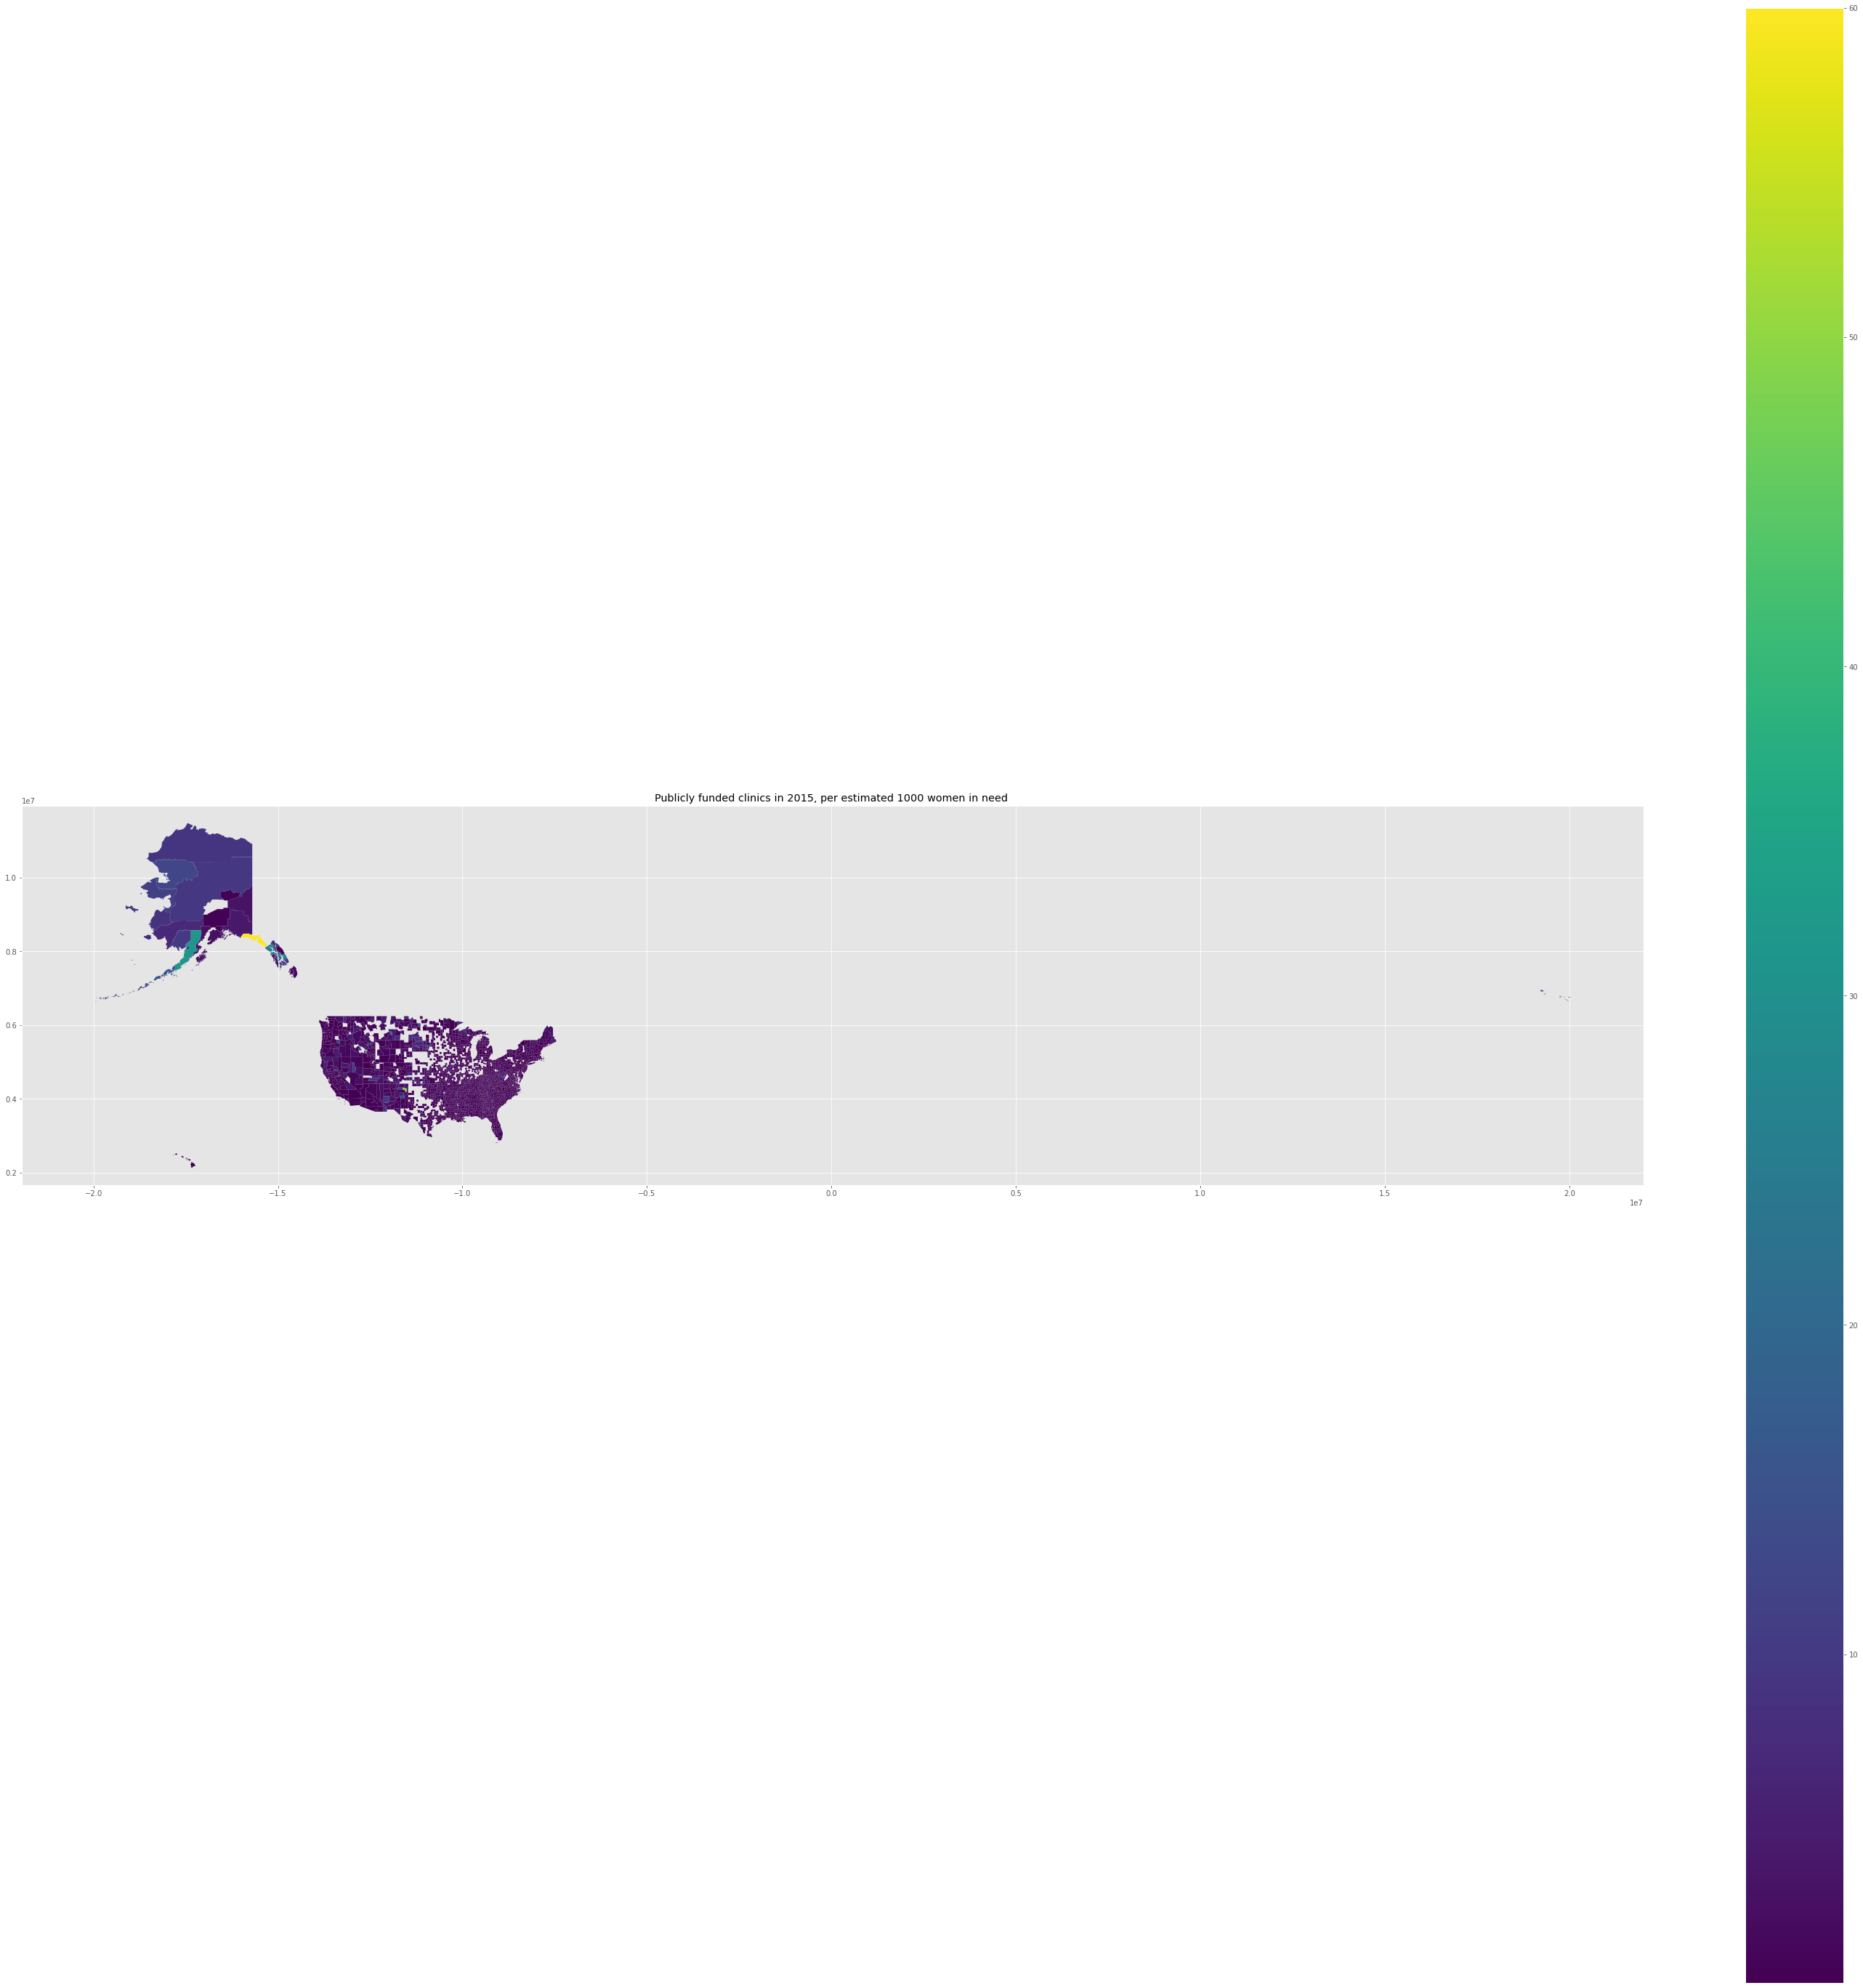

In [50]:
projected_geoaccess.plot(column='No. of clinics per 1000 women with demand',legend=True)
plt.title('Publicly funded clinics in 2015, per estimated 1000 women in need ')
plt.savefig('./data/Clinic_per_woman.png')